In [13]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

In [49]:
testsets = ["artificl", "calgary", "cantrbry", "large", "misc", "specification"]
dfs = []
for testset in testsets:
    df = pd.read_csv(f"stats/{testset}.csv")
    df["compression_ratio"] = df["input_size"] / df["compressed_size"]
    dfs.append(df)
    display(df)

,name,input_size,compressed_size,compression_ratio
0,aaa.txt,100000,2235,44.742729
1,a.txt,1,10,0.100000
2,alphabet.txt,100000,11340,8.818342
3,random.txt,100000,170945,0.584983


,name,input_size,compressed_size,compression_ratio
0,book2,610856,512560,1.191775
1,bib,111261,107295,1.036964
2,paper6,38105,45745,0.832987
3,progl,71646,68120,1.051762
4,paper2,82199,86685,0.948249
5,paper5,11954,17050,0.701114
6,progp,49379,49060,1.006502
7,paper3,46526,54525,0.853297
8,paper4,13286,18245,0.728200
9,progc,39611,47295,0.837530


,name,input_size,compressed_size,compression_ratio
0,fields.c,11150,13925,0.800718
1,cp.html,24603,28425,0.865541
2,xargs.1,4227,6720,0.629018
3,alice29.txt,152089,145460,1.045573
4,plrabn12.txt,481861,423550,1.137672
5,asyoulik.txt,125179,127955,0.978305
6,lcet10.txt,426754,360420,1.184046
7,grammar.lsp,3721,5355,0.694865


,name,input_size,compressed_size,compression_ratio
0,bible.txt,4047392,2454030,1.649284
1,E.coli,4638690,2455550,1.889064
2,world192.txt,2473400,1566530,1.578904


,name,input_size,compressed_size,compression_ratio
0,pi.txt,1000000,916445,1.091173


,name,input_size,compressed_size,compression_ratio
0,constituicao1988.txt,651790,445245,1.463891
1,os_lusiadas.txt,344538,325380,1.058879
2,tp1.txt,6550,9980,0.656313
3,dom_casmurro.txt,409610,370455,1.105694


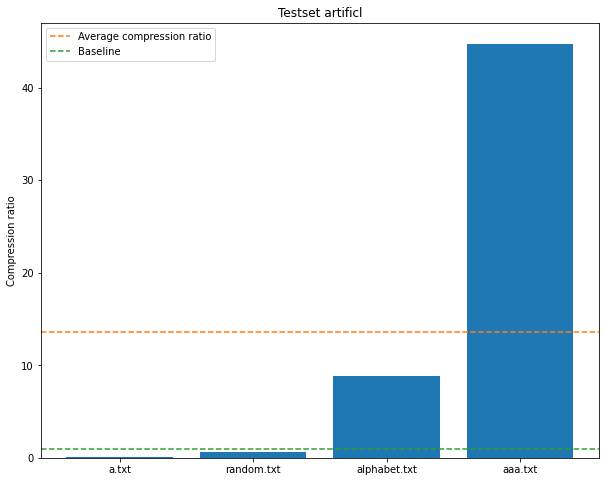

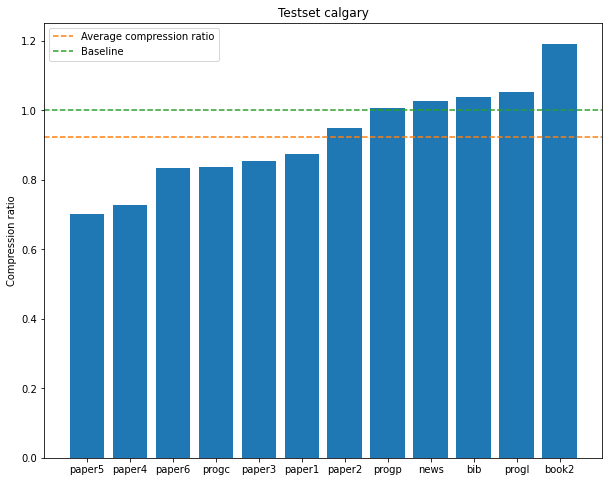

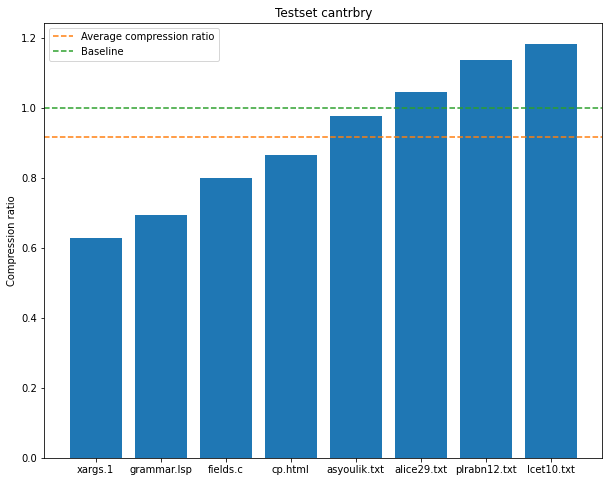

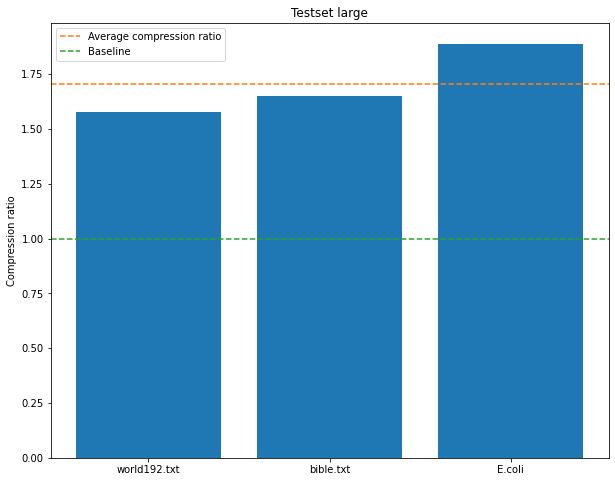

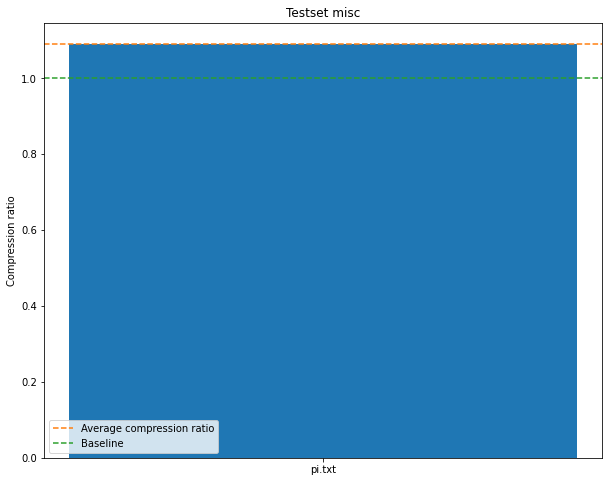

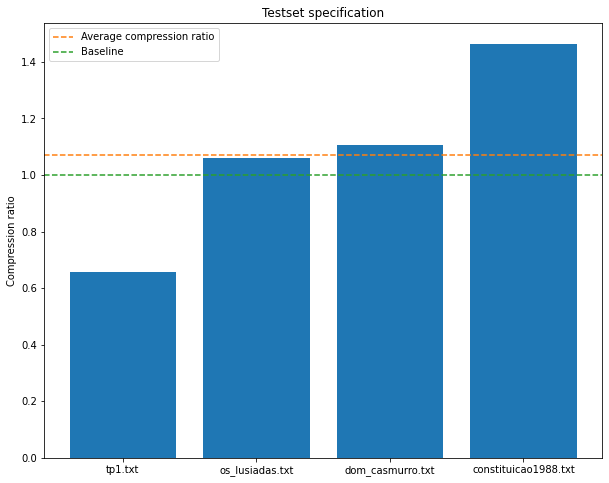

In [38]:
for i in range(len(testsets)):
    fig, ax = plt.subplots(figsize=(10, 8))
    dfs[i].sort_values("compression_ratio", inplace=True)
    ax.bar(dfs[i]["name"], dfs[i]["compression_ratio"])
    ax.set(
        title=f"Testset {testsets[i]}",
        ylabel="Compression ratio"
    )
    ax.axhline(y=np.mean(dfs[i]["compression_ratio"]), color='C1', ls='--', label="Average compression ratio")
    ax.axhline(y=1, color='C2', ls='--', label="Baseline")
    plt.legend()

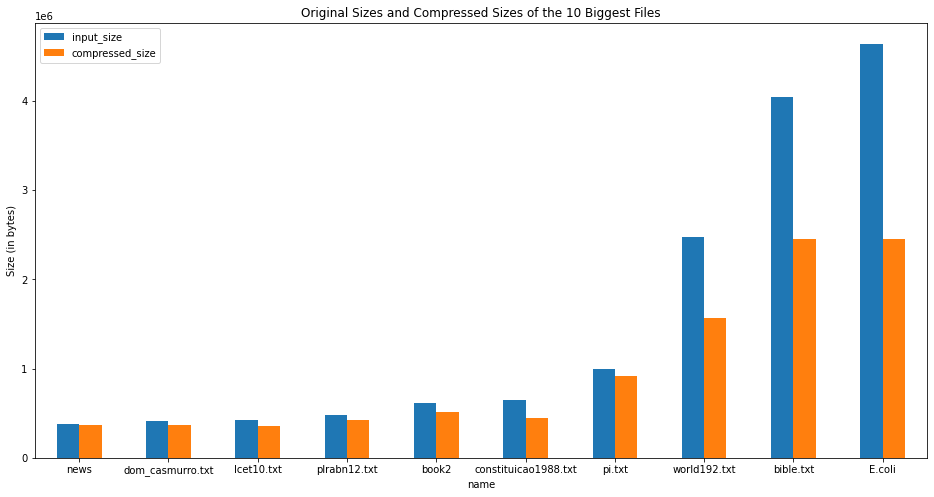

In [75]:
df = dfs[0]
for i in range(1, len(dfs)):
    df = pd.concat([df, dfs[i]], axis=0)
df.sort_values("input_size", inplace=True)
df = df[-10:]
fig, ax = plt.subplots(figsize=(16, 8))
df.plot(x="name", y=["input_size", "compressed_size"], kind="bar", rot=0, ax=ax)
ax.set(
    ylabel="Size (in bytes)",
    title="Original Sizes and Compressed Sizes of the 10 Biggest Files"
)
plt.show()